# ***Hand written digit Prediction - classification analysis***

*Objective* : This digits dataset consists of 8x8 pixel images of digits. The images attribute of the dataset stores 8x8 arrays of grayscale values for each image. We will use these arrays to visualize the first 4 images. The target attribute of the dataset stores the digit each image represents. Our objective is to predict which digit does the handwritten image represent, for the test dataset.

# Data source

 It is a dataset of handwritten digits called the MNIST dataset, which is a popular benchmark dataset for image classification tasks. It is a dataset loaded from sklearn.datasets by importing load_digits.

# Import Library

In [55]:
import numpy as np

In [56]:
import pandas as pd

In [57]:
import matplotlib.pyplot as plt

# Import Data

In [58]:
from sklearn.datasets import load_digits

In [59]:
df = load_digits()

# Describe data

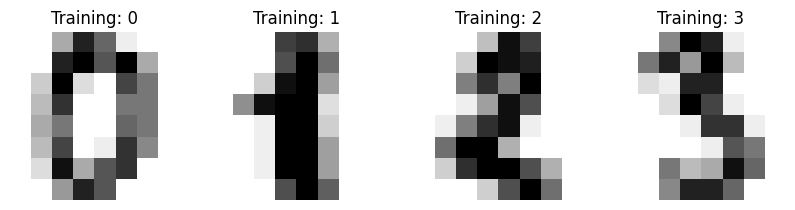

In [60]:
_, axes  = plt.subplots(nrows = 1, ncols = 4, figsize=(10,3))
for ax, image, label in zip(axes, df.images, df.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title("Training: %i" % label)

In [61]:
df.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [62]:
df.target

array([0, 1, 2, ..., 8, 9, 8])

In [63]:
print(df.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [64]:
print(df.data.shape)

(1797, 64)


In [65]:
df.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

# Data visualization

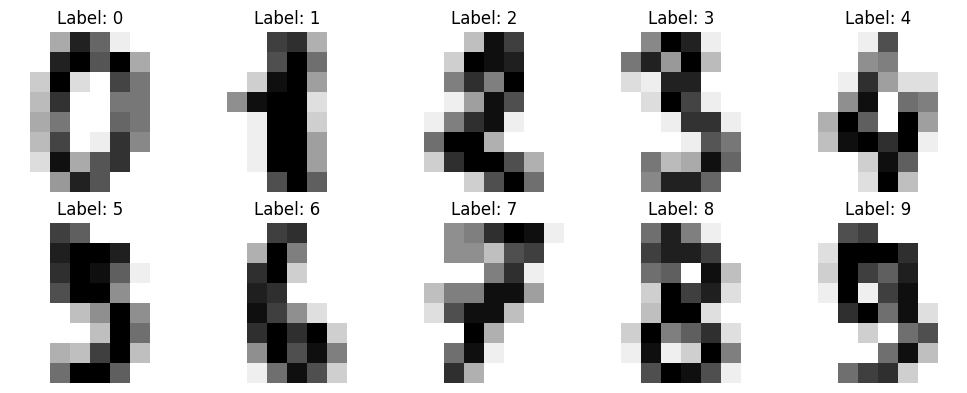

In [66]:
# Get the images and labels
images = df.images
labels = df.target

# Visualize the first 10 images
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap=plt.cm.gray_r)
    ax.set_title(f"Label: {labels[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()


# Data preprocessing

In [67]:
df.images.shape

(1797, 8, 8)

In [68]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [69]:
df.images[0].shape

(8, 8)

In [70]:
len(df.images)

1797

In [71]:
n_samples=len(df.images)
data = df.images.reshape(n_samples,-1)

In [72]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [73]:
data[0].shape

(64,)

In [74]:
data.shape

(1797, 64)

*Scaling the data*

In [75]:
data.min()

0.0

In [76]:
data.max()

16.0

In [77]:
data=data/16

In [78]:
data.min()

0.0

In [79]:
data.max()

1.0

In [80]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

# Define target variable(y) and feature variable(x)

In [81]:
y=df.target
x=data

In [82]:
x

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]])

In [83]:
y

array([0, 1, 2, ..., 8, 9, 8])

# Train test split

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [86]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

# Modeling - *Random* *forest* *Classifier*

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
rf=RandomForestClassifier()

In [89]:
rf.fit(x_train,y_train)

RandomForestClassifier()

# Prediction

In [90]:
y_pred=rf.predict(x_test)

In [91]:
y_pred

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 4, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 7, 7, 2, 9, 0, 4, 5, 8, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 1, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 9, 1, 4, 7, 6, 5, 1, 5,
       5, 1, 5, 2, 8, 8, 9, 9, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

# Model evaluation

In [92]:
from sklearn.metrics import confusion_matrix,classification_report

In [93]:
print(confusion_matrix(y_test,y_pred))

[[52  0  0  0  1  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 50  0  1  0  0  3  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  1 63  1  0  0  1]
 [ 0  0  0  0  0  1 52  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  1]
 [ 0  2  0  0  0  1  0  0 40  0]
 [ 0  0  0  0  0  0  0  1  1 57]]


In [94]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.96      1.00      0.98        50
           2       1.00      1.00      1.00        47
           3       1.00      0.93      0.96        54
           4       0.97      1.00      0.98        60
           5       0.95      0.95      0.95        66
           6       0.98      0.98      0.98        53
           7       0.98      0.98      0.98        55
           8       0.91      0.93      0.92        43
           9       0.97      0.97      0.97        59

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



# Explaination
Here I have used Random Forest classifier model which is a powerful ensemble learning algorithm that can be applied to various machine learning tasks, including classification. When applied to the *Hand written dataset* (MNIST dataset), which consists of images of handwritten digits, Random Forest can be an effective classifier for recognizing the digits (0 to 9) based on the pixel values.
Random Forest is known for its ability to handle high-dimensional datasets like images and can achieve high accuracy on the MNIST dataset. This has an accuracy of 97%.

# MODEL2 - *Bagging* *Classifier*

In [95]:
from sklearn.ensemble import BaggingClassifier

In [96]:
bg=BaggingClassifier()

In [97]:
bg.fit(x_train,y_train)

BaggingClassifier()

# Prediction 2

In [98]:
y_pred=bg.predict(x_test)

In [99]:
y_pred

array([6, 9, 3, 7, 2, 1, 5, 3, 5, 2, 2, 1, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 3, 5, 6, 0, 3, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 4, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 5, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 7, 7, 2, 9, 0, 4, 5, 8, 6, 5, 7, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 2, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 1, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 1, 6, 4, 5, 6, 8, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 5, 1, 5,
       5, 1, 4, 2, 8, 8, 7, 7, 7, 5, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

# Model evaluation 2

In [100]:
print(confusion_matrix(y_test,y_pred))

[[51  0  0  0  1  0  0  0  1  0]
 [ 0 49  1  0  0  0  0  0  0  0]
 [ 0  0 45  1  0  1  0  0  0  0]
 [ 0  0  0 49  0  1  0  0  3  1]
 [ 0  2  0  0 57  0  0  0  0  1]
 [ 0  0  0  0  1 64  1  0  0  0]
 [ 0  0  0  0  1  1 51  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  1]
 [ 0  2  1  0  1  1  0  0 38  0]
 [ 0  1  1  3  0  0  0  5  0 49]]


In [101]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        53
           1       0.91      0.98      0.94        50
           2       0.94      0.96      0.95        47
           3       0.92      0.91      0.92        54
           4       0.93      0.95      0.94        60
           5       0.94      0.97      0.96        66
           6       0.98      0.96      0.97        53
           7       0.92      0.98      0.95        55
           8       0.90      0.88      0.89        43
           9       0.94      0.83      0.88        59

    accuracy                           0.94       540
   macro avg       0.94      0.94      0.94       540
weighted avg       0.94      0.94      0.94       540



# Explaination
Here I used Bagging classifier. Bagging is an ensemble learning technique that can be used to improve the performance of various machine learning algorithms, including decision trees, on classification tasks like the MNIST dataset. The Bagging Classifier builds multiple base classifiers (usually decision trees) by training them on random subsets of the training data, and then combines their predictions through voting (for classification) or averaging (for regression).
This has an accuracy of 92%.

Out of these two models, the Highest accuracy model and the best fit model is
***Random forest Classifier***